# Summary
This notebook is used to transform mass difference (MD) 'documents' created in notebook 1 and normally processed SpectrumDocuments from the AllPositive dataset into lists of spectrum presence/absence per MD/fragment so Jaccard index can be used to assess correlation between MDs and fragments. Instead of binary presence/absence we will try also a weighted Jaccard using: in-spectrum counts, highest intensity, and transformed intensities.

Each MD/fragment will be represented by two lists: the spectra it occurs in and the intensities/counts in the spectra (linked lists). A MD/fragment will be a tuple of (MD/fragment, [spectrum_A,], [intensity_spectrum_A,]). From this we can calculate Jaccard similarities and put these in a matrix:

```
    fragment0 →
MD0 Jaccard0,0
↓
```

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

data_path = "/mnt/scratch/louwe015/Mass_differences/data/"

## Load SpectrumDocuments


In [12]:
# load processed SpectrumDocuments file
documents_file = "/mnt/scratch/louwe015/Mass_differences/data/gnps_positive_ionmode_cleaned_by_matchms_and_lookups_processed_documents.pickle"
if os.path.exists(documents_file):
    with open(documents_file, 'rb') as inf:
        documents_spectrums_processed = pickle.load(inf)  # list of SpectrumDocuments
else:
    print("error")

In [14]:
print(len(documents_spectrums_processed))

95279


In [15]:
documents_spectrums_processed[0].words, documents_spectrums_processed[0].weights

(['peak@289.29',
  'peak@295.55',
  'peak@298.49',
  'peak@317.32',
  'peak@319.66',
  'peak@324.48',
  'peak@325.32',
  'peak@339.79',
  'peak@343.95',
  'peak@347.02',
  'peak@347.91',
  'peak@361.15',
  'peak@361.84',
  'peak@364.23',
  'peak@364.86',
  'peak@365.85',
  'peak@368.22',
  'peak@368.97',
  'peak@375.07',
  'peak@375.75',
  'peak@382.75',
  'peak@384.20',
  'peak@390.57',
  'peak@394.05',
  'peak@397.11',
  'peak@404.42',
  'peak@411.09',
  'peak@413.78',
  'peak@427.67',
  'peak@436.19',
  'peak@443.27',
  'peak@446.27',
  'peak@447.75',
  'peak@455.25',
  'peak@456.11',
  'peak@457.54',
  'peak@464.29',
  'peak@469.87',
  'peak@471.06',
  'peak@475.26',
  'peak@476.14',
  'peak@476.98',
  'peak@478.89',
  'peak@479.98',
  'peak@483.24',
  'peak@487.21',
  'peak@488.16',
  'peak@491.19',
  'peak@494.28',
  'peak@495.65',
  'peak@498.41',
  'peak@503.03',
  'peak@504.34',
  'peak@505.15',
  'peak@510.18',
  'peak@512.17',
  'peak@513.27',
  'peak@514.96',
  'peak@515.92

## Get spectrum occurrence per fragment/neutral loss

In [16]:
# get per_fragment spectrum occurrence
per_fragment_spec_occ_dict = {}  # dict of {frag: [[spectra_names], [intensities]]}
for i, doc in enumerate(documents_spectrums_processed):
    spec_name = str(i)
    for word, intensity in zip(doc.words, doc.weights):
        if word in per_fragment_spec_occ_dict:
            per_fragment_spec_occ_dict[word][0].append(spec_name)
            per_fragment_spec_occ_dict[word][1].append(intensity)
        else:
            per_fragment_spec_occ_dict[word] = []
            per_fragment_spec_occ_dict[word].append([spec_name])
            per_fragment_spec_occ_dict[word].append([intensity])

In [17]:
print("Number of fragments (and neutral losses):", len(per_fragment_spec_occ_dict.keys()))

Number of fragments (and neutral losses): 115910


In [18]:
# get the occurrence per fragment
fragment_occurrences = [len(vals[0]) for vals in per_fragment_spec_occ_dict.values()]

Ten highest fragment occurences: [20545, 21623, 21883, 23201, 24241, 25787, 26138, 26806, 27451, 27710]


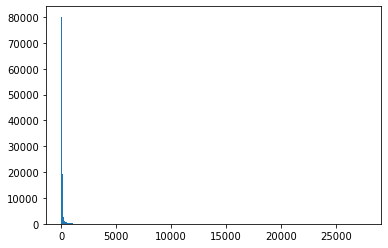

111580 fragments and neutral losses left after filtering for occurrence between 0 and 500


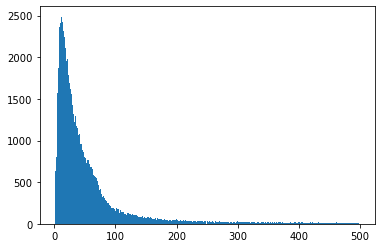

In [19]:
sorted_fragment_occurrences = sorted(fragment_occurrences)
print("Ten highest fragment occurences:", sorted_fragment_occurrences[-10:])
plt.subplots(0)
plt.hist(fragment_occurrences, bins = 500)
plt.show()

cut_max = 500
cut_min = 0
filtered_fragment_occurrences = [occ for occ in fragment_occurrences if occ >= cut_min and occ < cut_max]
print(f"{len(filtered_fragment_occurrences)} fragments and neutral losses left after filtering for occurrence between {cut_min} and {cut_max}")
plt.subplots(1)
plt.hist(filtered_fragment_occurrences, bins = cut_max - cut_min)
plt.show()

In [20]:
per_fragment_spec_occ_dict["peak@162.20"]  # something sugary?

[['872',
  '921',
  '4087',
  '4232',
  '4548',
  '5171',
  '5274',
  '7121',
  '7129',
  '7582',
  '7813',
  '8241',
  '8265',
  '8411',
  '8549',
  '8631',
  '8645',
  '8836',
  '9143',
  '9185',
  '9815',
  '11965',
  '13426',
  '16908',
  '17532',
  '21015',
  '21427',
  '22178',
  '22236',
  '24975',
  '25343',
  '27550',
  '30554',
  '54834',
  '57552',
  '58380',
  '61799',
  '61800',
  '61828',
  '61915',
  '62905',
  '62921',
  '62968',
  '62969',
  '63075',
  '63227',
  '63228',
  '63230',
  '63275',
  '63281',
  '63424',
  '63454',
  '63455',
  '63456',
  '63468',
  '63598',
  '63603',
  '63619',
  '63920',
  '63980',
  '64094',
  '64095',
  '64096',
  '64097',
  '64136',
  '64346',
  '64435',
  '64615',
  '64617',
  '64631',
  '64667',
  '64669',
  '64701',
  '64772',
  '64856',
  '64859',
  '72864',
  '73143',
  '74609',
  '74925',
  '75021',
  '75590',
  '76038',
  '77553',
  '82583',
  '83038',
  '84083',
  '86809',
  '88577',
  '90311',
  '91636'],
 [0.00302492273295193

In [21]:
cut_max = 500
print(f"Filtering out fragments above {cut_max} occurrence.")
per_fragment_spec_occ_dict_filtered = {key:val for key, val in per_fragment_spec_occ_dict.items() if len(val[0]) < cut_max}
print(f"{len(per_fragment_spec_occ_dict_filtered)} fragments + neutral losses left after filtering")

Filtering out fragments above 500 occurrence.
111580 fragments + neutral losses left after filtering


## Get spectrum occurrence per MD

In [22]:
# load md documents
md_documents_filtered_file = "/mnt/scratch/louwe015/Mass_differences/data/gnps_positive_ionmode_cleaned_by_matchms_and_lookups_mass_difference_documents_filtered.pickle"
if os.path.exists(md_documents_filtered_file):
    with open(md_documents_filtered_file, 'rb') as inf:
        md_documents_filtered = pickle.load(inf)  # list of list of tuples 'documents'
    print(len(md_documents_filtered))
else:
    print("error")

95279


In [23]:
per_md_spec_occ_dict = {}  # dict of {frag: [[spectra_names], [[intensities]]]}
for i, doc in enumerate(md_documents_filtered):
    spec_name = str(i)
    for tup in doc:
        word = tup[0]
        intensity = tup[1]
        if word in per_md_spec_occ_dict:
            per_md_spec_occ_dict[word][0].append(spec_name)
            per_md_spec_occ_dict[word][1].append(intensity)
        else:
            per_md_spec_occ_dict[word] = []
            per_md_spec_occ_dict[word].append([spec_name])
            per_md_spec_occ_dict[word].append([intensity])

In [24]:
per_md_spec_occ_dict.keys()

dict_keys(['43.32', '43.97', '45.13', '45.24', '54.26', '55.10', '57.05', '60.14', '61.17', '61.35', '61.99', '79.98', '80.97', '83.43', '87.10', '96.15', '96.98', '98.23', '101.03', '102.02', '102.12', '105.96', '111.32', '112.15', '112.31', '112.82', '113.14', '113.94', '116.25', '117.09', '122.99', '124.73', '125.07', '129.48', '134.12', '143.25', '156.04', '157.11', '229.31', '231.06', '240.10', '240.44', '248.08', '251.99', '252.03', '253.02', '257.06', '266.94', '268.19', '269.02', '291.40', '295.35', '296.34', '308.22', '309.43', '310.07', '312.16', '313.15', '313.38', '314.37', '320.04', '327.08', '333.00', '337.20', '340.27', '350.02', '353.01', '353.39', '354.04', '355.14', '364.14', '364.33', '365.17', '365.84', '370.21', '371.29', '371.42', '382.41', '393.13', '397.37', '399.28', '407.66', '408.49', '410.41', '414.18', '415.27', '415.39', '424.47', '425.31', '425.68', '425.97', '426.52', '437.47', '448.60', '483.52', '494.65', '497.29', '508.42', '182.95', '36.88', '38.03',

In [25]:
len(per_md_spec_occ_dict['157.02'][0])  # i know from notebook 1 that this is the highest occurring MD, should be 499

496

## Turning spectra occurrence dicts into lists
Lists of [(md/fragment, [spectra_names], [intensities])]

In [26]:
# mass differences
per_md_spec_occ = [(key, val[0], val[1]) for key, val in per_md_spec_occ_dict.items()]
per_md_spec_occ.sort(key=lambda x: float(x[0]))
per_md_spec_occ[:10]

[('36.01',
  ['14',
   '99',
   '157',
   '176',
   '189',
   '198',
   '207',
   '227',
   '249',
   '280',
   '282',
   '283',
   '311',
   '352',
   '354',
   '360',
   '361',
   '383',
   '412',
   '525',
   '575',
   '913',
   '932',
   '940',
   '969',
   '1033',
   '1069',
   '1115',
   '1117',
   '1121',
   '1137',
   '1184',
   '1235',
   '1236',
   '1264',
   '1265',
   '1293',
   '1302',
   '1357',
   '1374',
   '1375',
   '1509',
   '1514',
   '1523',
   '1588',
   '1622',
   '1682',
   '1690',
   '1695',
   '1750',
   '1764',
   '1770',
   '1784',
   '1813',
   '1867',
   '1947',
   '1948',
   '1949',
   '2170',
   '2207',
   '2241',
   '2305',
   '2351',
   '2504',
   '2509',
   '2515',
   '2544',
   '2734',
   '2736',
   '2737',
   '2745',
   '2758',
   '2804',
   '2805',
   '2812',
   '2816',
   '2817',
   '2819',
   '2821',
   '2840',
   '2841',
   '2866',
   '2888',
   '2948',
   '2949',
   '2972',
   '3003',
   '3009',
   '3032',
   '3033',
   '3088',
   '3421',
   '

In [27]:
per_fragment_spec_occ = [(key, val[0], val[1]) for key, val in per_fragment_spec_occ_dict_filtered.items()]
per_fragment_spec_occ.sort(key=lambda x: float(x[0].split("@")[-1]))
per_fragment_spec_occ[:10]

[('peak@4.59', ['94357'], [0.11639]),
 ('loss@5.00',
  ['947',
   '1399',
   '2554',
   '2555',
   '3492',
   '5287',
   '6944',
   '10281',
   '18849',
   '19021',
   '19920',
   '22895',
   '23593',
   '27613',
   '42278',
   '48709',
   '64737',
   '70409',
   '70410',
   '79543',
   '84918',
   '89661',
   '89662'],
  [0.002926556969842475,
   0.0011060088480707845,
   0.005644837950376334,
   0.005644837950376334,
   0.005897435897435898,
   0.03358051414907205,
   0.0036467751657625076,
   0.008158582446299955,
   0.00120395252695493,
   0.0021147173846154644,
   0.018726591760299626,
   0.008925185989174262,
   0.0022165800185386694,
   0.012133003183586842,
   0.009568726328149106,
   0.013018619558594924,
   0.00295205022537828,
   0.03483372,
   0.022272590000000002,
   0.01307294,
   0.016642729999999998,
   0.0057454,
   0.00569154]),
 ('loss@5.01',
  ['1821',
   '2061',
   '3827',
   '3875',
   '5503',
   '6164',
   '6490',
   '6493',
   '7208',
   '7231',
   '7333',
   '1

## Prospecting of how to calculate the jaccard similarity for all the pairs

In [28]:
# number of operations
len(per_fragment_spec_occ) * len(per_md_spec_occ)

6764983820

In [29]:
# number of operations without losses
len([0 for tup in per_fragment_spec_occ if not 'loss' in tup[0]])* len(per_md_spec_occ)

5680149123

In [30]:
# do some multiprocessing approach per row of operations? and represent as sparse matrices? -> most values will be 0

In [31]:
from typing import List
def jaccard_list_occurrences(list_1: List[str], list_2: List[str]) -> float:
    """Return jaccard similarity (intersection/union) of the input lists
    
    Parameters
    ------------
    list_1:
        List of words (str)
    list_2:
        List of words (str)
    """
    set_1 = set(list_1)
    set_2 = set(list_2)
    jac_sim = len(set_1 & set_2) / len(set_1 | set_2)
    return jac_sim

In [32]:
x=10545 # 162.19 something sugary?
print(per_md_spec_occ[x][0])

results = []
for i, frag_info in enumerate(per_fragment_spec_occ):
    jac_sim = jaccard_list_occurrences(per_md_spec_occ[x][1], per_fragment_spec_occ[i][1])
    results.append((i, jac_sim))

results.sort(key=lambda x: x[1], reverse=True)
results[:5], [per_fragment_spec_occ[res[0]][0] for res in results[:5]]

142.90


([(38026, 0.06153846153846154),
  (42067, 0.05263157894736842),
  (42100, 0.04868913857677903),
  (39466, 0.04784688995215311),
  (32928, 0.03977272727272727)],
 ['peak@257.94', 'peak@301.93', 'peak@302.28', 'peak@273.94', 'peak@199.98'])

In [33]:
# how long does one row take?
import time

start = time.time()
results = []
for i, frag_info in enumerate(per_fragment_spec_occ):
    jac_sim = jaccard_list_occurrences(per_md_spec_occ[x][1], per_fragment_spec_occ[i][1])
    results.append((i, jac_sim))
end = time.time()
print("Time (s) elapsed:", end-start)

Time (s) elapsed: 1.677638292312622


In [34]:
# projected time of all comparisons -> with multiple cores this is perfectly fine
print('Projected time (h) for total dataset:', (end-start)*len(per_md_spec_occ)/3600)

Projected time (h) for total dataset: 28.253758895728325


## Make some multiprocessing function that takes one row of computation per worker

In [35]:
from multiprocessing import Pool
from typing import List

def calculate_row_jaccard(md_occ_list: List[str], all_fragment_occ_list: List[List[str]]) -> List[float]:
    """For one mass difference, calc Jaccard similarity to all fragments/neutral losses
    
    Parameters
    -----------
    md_occ_list:
        List of spectra names in which a MD occurs
    all_fragment_occ_list:
        List of list of spectra names of spectra occurrences for all fragments/neutral losses
    """
    jaccard_sims = []
    for frag_occ_list in all_fragment_occ_list:
        jaccard_sims.append(jaccard_list_occurrences(md_occ_list, frag_occ_list))
    return jaccard_sims

In [36]:
x = 10545
test_md_occ_list = per_md_spec_occ[x][1]
test_all_fragment_occ_list = [tup[1] for tup in per_fragment_spec_occ]
jacc_x = calculate_row_jaccard(test_md_occ_list, test_all_fragment_occ_list)
len(jacc_x), len([jx for jx in jacc_x if jx != 0])

(111580, 6349)

In [37]:
test_len = 100
test_mp_md_occ_list = [per_md_spec_occ[y][1] for y in range(test_len)]

In [38]:
from functools import partial
with Pool(processes=2) as pool:
    jaccard_similarities_test_100 = pool.map(partial(\
                                                     calculate_row_jaccard,
                                                     all_fragment_occ_list = test_all_fragment_occ_list),
                                             test_mp_md_occ_list)
# move to a script so it can be run in background

In [39]:
len(jaccard_similarities_test_100)

100

## Save files

In [40]:
md_occ_list_file = os.path.join(data_path,
                                "gnps_positive_ionmode_cleaned_by_matchms_and_lookups_mass_difference_occurrence.pickle")
with open(md_occ_list_file, 'wb') as outf:
    pickle.dump(per_md_spec_occ, outf)

In [41]:
frag_occ_list_file = os.path.join(data_path,
                                  "gnps_positive_ionmode_cleaned_by_matchms_and_lookups_fragments_occurrences.pickle")
with open(frag_occ_list_file, 'wb') as outf:
    pickle.dump(per_fragment_spec_occ, outf)